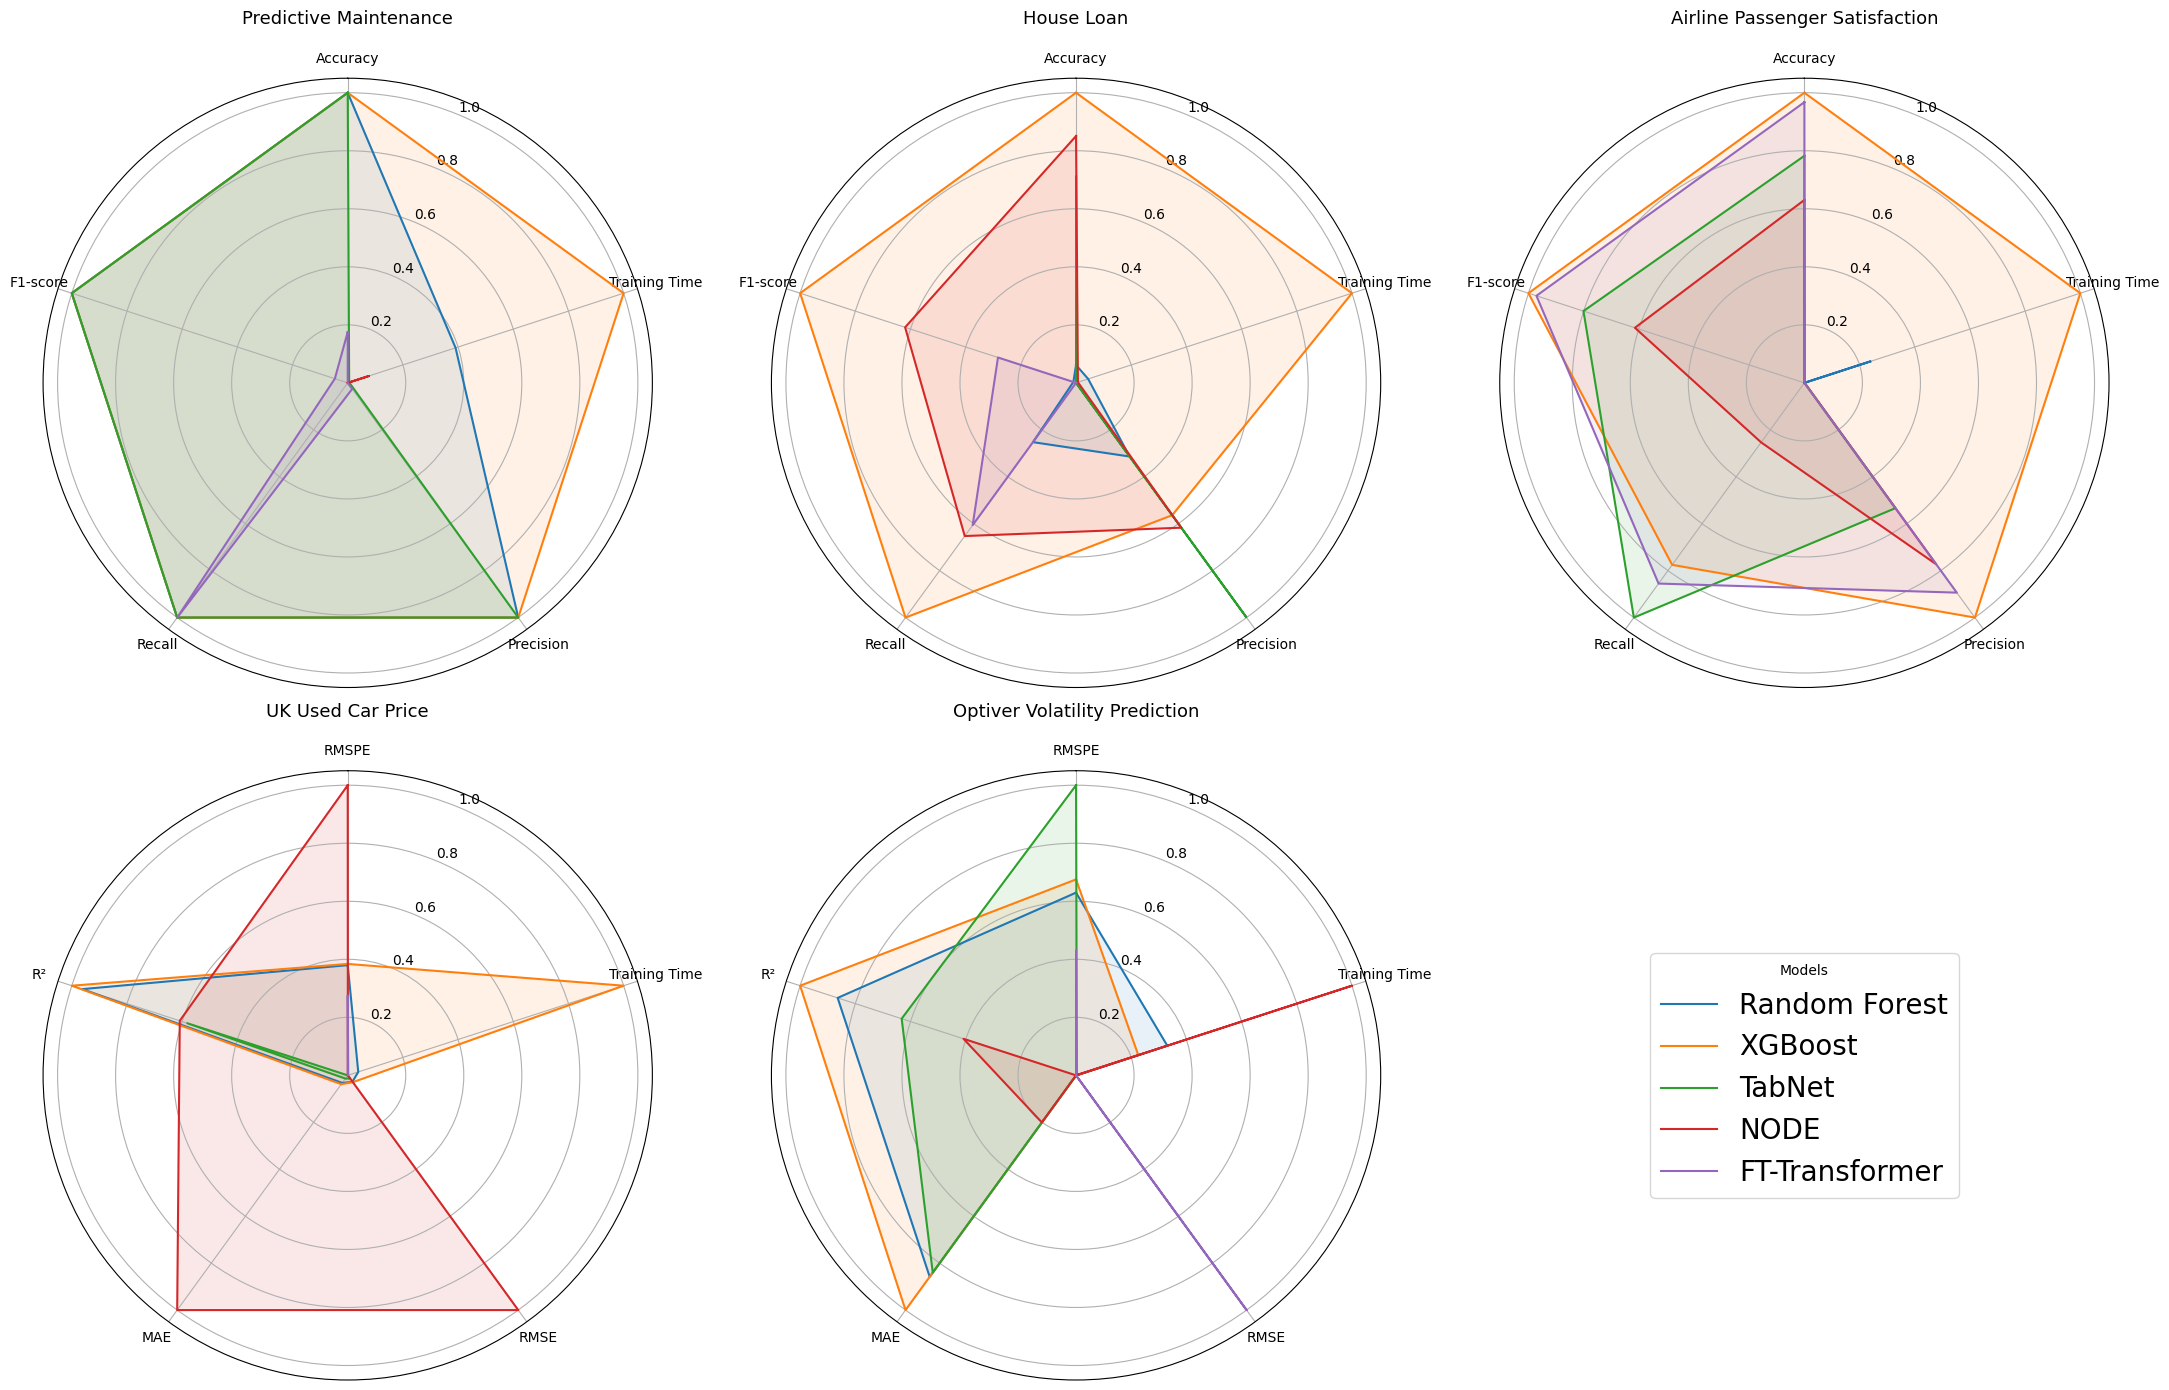

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def min_max_normalize(df, inverse_cols=None):
    df_norm = df.copy()
    for col in df.columns:
        col_data = df[col]
        if inverse_cols and col in inverse_cols:
            col_data = 1 / (col_data + 1e-8)  # Avoid division by zero
        min_val = col_data.min()
        max_val = col_data.max()
        df_norm[col] = (col_data - min_val) / (max_val - min_val)
    return df_norm

def plot_radar_chart(df, title, labels, ax):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    for idx, row in df.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=row.name)
        ax.fill(angles, values, alpha=0.1)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, size=13, pad=20)

# First row datasets
df1 = pd.DataFrame({
    'Accuracy': [0.9990, 0.9990, 0.9990, 0.7535, 0.7965],
    'Training Time': [0.3058, 0.1198, 17.9703, 1.5437, 81.6213],
    'Precision': [1.0000, 1.0000, 1.0000, 0.1171, 0.1401],
    'Recall': [0.9706, 0.9706, 0.9706, 0.9559, 0.9706],
    'F1-score': [0.9851, 0.9851, 0.9851, 0.2087, 0.2449],
}, index=['Random Forest', 'XGBoost', 'TabNet', 'NODE', 'FT-Transformer'])

df2 = pd.DataFrame({
    'Accuracy': [0.6177, 0.6284, 0.6251, 0.6267, 0.6170],
    'Training Time': [7.08, 0.33, 115.14, 34.15, 88.77],
    'Precision': [0.6194, 0.6241, 0.6323, 0.6251, 0.6135],
    'Recall': [0.5976, 0.6331, 0.5856, 0.6166, 0.6144],
    'F1-score': [0.6083, 0.6286, 0.6081, 0.6208, 0.6139],
}, index=['Random Forest', 'XGBoost', 'TabNet', 'NODE', 'FT-Transformer'])

df3 = pd.DataFrame({
    'Accuracy': [0.9299, 0.9575, 0.9515, 0.9473, 0.9566],
    'Training Time': [0.5746, 0.1394, 207.2333, 91.3502, 139.1008],
    'Precision': [0.9295, 0.9709, 0.9516, 0.9615, 0.9665],
    'Recall': [0.9104, 0.9318, 0.9380, 0.9174, 0.9340],
    'F1-score': [0.9198, 0.9509, 0.9447, 0.9389, 0.9500],
}, index=['Random Forest', 'XGBoost', 'TabNet', 'NODE', 'FT-Transformer'])

# Second row datasets
df4 = pd.DataFrame({
    'RMSPE': [0.0107, 0.0106, 0.0685, 0.0045, 0.0140],
    'Training Time': [1.0525, 0.0407, 84.6807, 39.2995, 18.0074],
    'MAE': [0.0756, 0.0722, 0.0900, 0.0081, 0.1047],
    'RMSE': [0.1034, 0.1018, 0.1179, 0.0107, 0.1372],
    'R²': [0.9534, 0.9548, 0.9394, 0.9404, 0.9180],
}, index=['Random Forest', 'XGBoost', 'TabNet', 'NODE', 'FT-Transformer'])

df5 = pd.DataFrame({
    'RMSPE': [0.2666, 0.2579, 0.2093, 0.4989, 0.3131],
    'Training Time': [57, 78, 356, 21, 373],  # Convert time to minutes
    'RMSE': [0.001113, 0.001053, 0.001210, 0.001296, 0.000002],
    'MAE': [0.000662, 0.000632, 0.000666, 0.000849, 0.000929],
    'R²': [0.8562, 0.8715, 0.8301, 0.8049, 0.7590],
}, index=['Random Forest', 'XGBoost', 'TabNet', 'NODE', 'FT-Transformer'])

inverse_cols = ['RMSPE', 'RMSE', 'MAE', 'Training Time']

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(22, 14), subplot_kw=dict(polar=True))
datasets = [df1, df2, df3, df4, df5]
titles = [
    "Predictive Maintenance",
    "House Loan",
    "Airline Passenger Satisfaction",
    "UK Used Car Price",
    "Optiver Volatility Prediction"
]
labels_first = ['Accuracy', 'Training Time', 'Precision', 'Recall', 'F1-score']
labels_second = ['RMSPE','Training Time', 'RMSE', 'MAE', 'R²']


for i, (df, title) in enumerate(zip(datasets, titles)):
        ax = axs[i // 3, i % 3]
        label_set = labels_first if i < 3 else labels_second
        norm_df = min_max_normalize(df[label_set], inverse_cols=inverse_cols)
        plot_radar_chart(norm_df, title, label_set, ax)

axs[1, 2].axis('off')  # Turn off the empty subplot

# Add a shared legend to the empty subplot location
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[1, 2].legend(handles, labels, loc='center', frameon=True, ncol=1, fontsize=20, title="Models")

plt.tight_layout()
plt.show()